### Imports

In [7]:
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

### Monte Carlo Program for the Two-Dimensional Ising Model

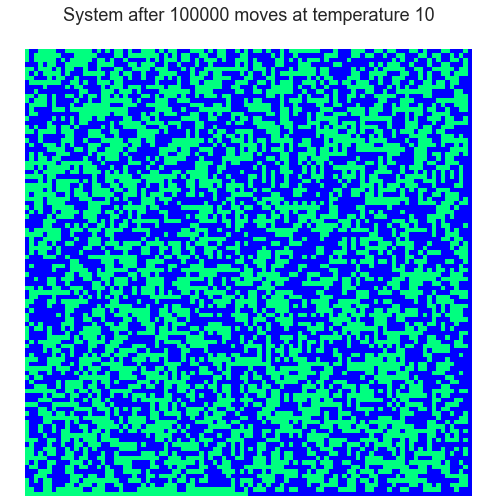

In [33]:
class Two_D_Ising:

    def __init__(self, N, is_random=False):
        self.N = N
        if is_random:
            system = np.random.uniform(0, 1, size=(N, N)).round()
            system = (2 * system) - 1
            self.system = system.astype(np.int16)
        else:
            assert N % 2 == 0, "N must be even for pure state initialization"
            up   = np.ones(shape=(N, int(N/2)))
            down = -1 * np.ones(shape=(N, int(N/2)))
            self.system = np.hstack([up, down])
        self.old_system = self.system.copy()

    def valid_coords(self, row, col, i, j):
        N = self.N
        return (row + i < N and col + j < N and row + i > 0 and col + j > 0)

    def sum_nearby(self):
        r = self.row
        c = self.col
        nearby = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        return sum([self.system[r + i][c + j] for i, j in nearby if self.valid_coords(r, c, i, j)])
    
    def swap(self):
        self.system[self.row][self.col] *= -1

    def disorder_system(self, num_moves, temperature):
        beta = 1 / temperature
        for _ in range(num_moves):
            self.row = np.random.randint(0, high=self.N-1)
            self.col = np.random.randint(0, high=self.N-1)
            
            spin = self.system[self.row][self.col]
            cost = 2 * spin * self.sum_nearby()
            if cost < 0:
                self.swap()
            else:
                sample = np.random.uniform()
                prob   = np.exp(-beta * cost)
                if sample < prob:
                    self.swap()

num_moves   = 100000
temperature = 10
 
model = Two_D_Ising(N = 100, is_random = False)
model.disorder_system(num_moves, temperature)

plt.figure(figsize=(8, 8))
plt.matshow(model.system, cmap="winter", fignum=1)
plt.axis('off')
plt.title(f"System after {num_moves} moves at temperature {temperature}", fontsize=18);

### Advanced plot

This shows different scenerios for the 2D Ising model

In [81]:
N         = 100
num_moves = 100000

systems = list()
for israndom in (True, False):
    for temperature in (0.2, 2, 10): 
        model = Two_D_Ising(N = N, is_random = israndom)
        model.disorder_system(num_moves, temperature)
        system = (israndom, temperature, model.old_system, model.system)
        systems.append(system)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Original', f'After {num_moves} moves'),)

for i, system in enumerate(systems):
    trace = go.Heatmap(z=system[2],
                       colorscale=[[0, "rgb(50, 235, 50)"], [1, "rgb(50, 50, 235)"]],
                       showlegend=False,
                       showscale=False)
    fig.append_trace(trace, 1, 1)
    
for i, system in enumerate(systems):
    trace = go.Heatmap(z=system[3],
                       colorscale=[[0, "rgb(50, 235, 50)"], [1, "rgb(50, 50, 235)"]],
                       showlegend=False,
                       showscale=False)
    fig.append_trace(trace, 1, 2)

### Create buttons for drop down menu
buttons = []
for i, system in enumerate(systems):
    random = {True: "Random", False: "Not random"}[system[0]]
    label = f"{random} at temperature {system[1]}"
    visibility = [i==j for j in range(len(systems))]
    button = dict(
                 label =  label,
                 method = 'update',
                 args = [{'visible': visibility},
                     {'title': label}])
    buttons.append(button)

updatemenus = list([
    dict(active=-1,
         buttons=buttons,
         direction = 'down',
         pad = {'r': 10, 't': 10},
         showactive = True,
         x = 0.05,
         xanchor = 'left',
         y = 1.2,
         yanchor = 'top' 
    )
])

fig["layout"]["width"] = 1000
fig["layout"]["height"] = 550
fig["layout"]["autosize"] = True
fig["layout"]["margin"] = dict(t=0, b=30, l=0, r=0)
fig['layout']['updatemenus'] = updatemenus

for axis in ("xaxis1", "xaxis2", "yaxis1", "yaxis2"):
    fig.layout[axis]["autorange"] = True
    fig.layout[axis]["ticks"] = ''
    for trait in ("showgrid", "zeroline", "showline", "showticklabels"):
        fig.layout[axis][trait] = False
        
iplot(fig);

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]

